<a href="https://colab.research.google.com/github/farrahfox/Probability-Statistics/blob/main/Farrah_Fox_Math24_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Monte Carlo

In [3]:
# Define x-axis

In [4]:
x = np.linspace(-3,3,100)

In [5]:
# name an equation

In [6]:
y = x**2 + 5

In [7]:
# plot of that function

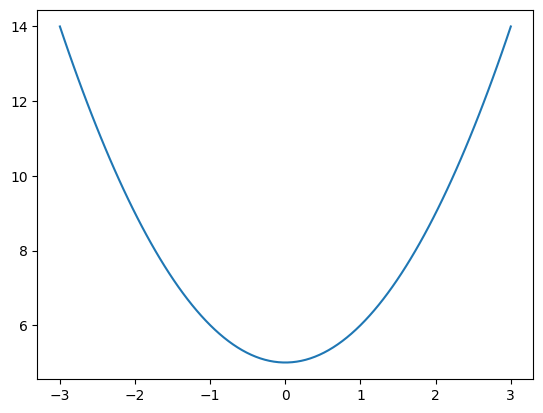

In [8]:
plt.plot(x,y)

$f(x) = x^2 + 2$

$Area = \int_a^bf(x) dx$

$= \int_a^b (x^2+2) dx$

$= \left.\frac{x^3}{3}+2x\right\vert_1^2$

$= (\frac{8}{3}+4) - (\frac{1}{3}+2)$

$= \frac{13}{3}$

In [ ]:
# divison

In [ ]:
13/3

4.333333333333333

To integrate the function $f(x)$ over the interval $[a,b]$ we

[1] find some value $M$ such that $f(x) < M$ over the interval $[a,b]$

[2] select a random number $x$ from a uniform distribution over the interval $[a,b]$

[3] select a random number y from a uniform distribution over the interval $[0,M]$

[4] determine if $y > f(x)$ or $y ≤ f(x)$

[5] repeat this process $N$ times, keeping track of the number of times $y ≤ f(x)$ or under the curve, successes $S$.

The estimated probability of success is then:

$\frac{S}{N}=\frac{\text{Area under curve}}{\text{Total area inside rectangle}} = \frac{\int_a^bf(x)dx}{M(b-a)}$

$\int_a^bf(x)dx = M(b-a)\frac{S}{N}$

In [ ]:
# define a function

In [9]:
def f(x):
    y = x**2 + 5
    return y

In [ ]:
# plot of function

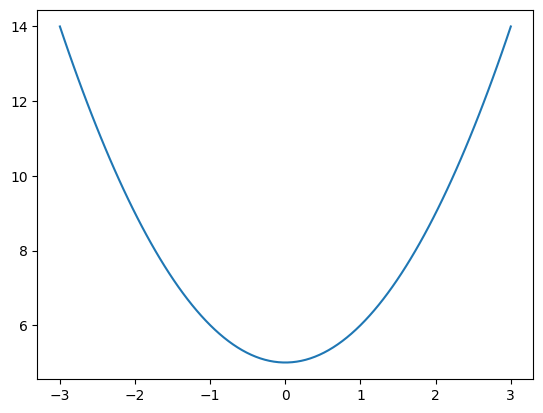

In [10]:
plt.plot(x,f(x))

In [ ]:
# setting some constants

In [ ]:
M = 10

In [ ]:
a = 1
b = 2

In [ ]:
# Putting the constants into an equation

In [ ]:
x = a + (b-a)*np.random.random()

In [ ]:
# Calling the result of that equation

In [ ]:
x

1.0392033943767065

In [ ]:
# making a new equation

In [ ]:
y = M*np.random.random()

In [ ]:
x,y,f(x)

(1.0392033943767065, 17.236871078427065, 3.0799436948840686)

In [ ]:
# defining an inequality

In [ ]:
y < f(x)

False

In [ ]:
# A for-loop with the equation

In [ ]:
N = 100_000
S = 0
for i in range(N):

    x = a + (b-a)*np.random.random()
    y = M*np.random.random()

    S += (y < f(x))

M*(b-a)*(S/N)

4.3114

In [ ]:
# defining a function which outputs the result of y

In [ ]:
def f(x):
    y = x**2 + 2
    return y

In [ ]:
# defining a function for monte carlo integration

In [ ]:
def monte_carlo_integrate(f,a,b,N):

    N = 10000000
    S = 0
    for i in range(N):

        x = a + (b-a)*np.random.random()
        y = M*np.random.random()

        S += (y < f(x))

    return M*(b-a)*(S/N)

In [ ]:
# calling function

In [ ]:
monte_carlo_integrate(f,1,2,1000)

4.334346

In [ ]:
# importing a symbol from a specific library

In [ ]:
from sympy import *

In [ ]:
x = Symbol('x')

In [ ]:
x

x

In [ ]:
# integrating x^2 + 2 with boundary conditions of 1 and 2

In [ ]:
integrate(x**2 + 2, (x,1,2))

13/3

In [ ]:
13/3

4.333333333333333

In [ ]:
integrate(x**3 + 3, (x,1,2))

27/4

In [ ]:
27/4

6.75

In [ ]:
x = 0

In [ ]:
# declaring a new function that y represents

In [ ]:
def f(x):
    y = x**3 + 3
    return y

In [ ]:
# using the user-made function

In [ ]:
monte_carlo_integrate(f,1,2,1000000)

6.747921999999999

In [ ]:
# for-loop with 2000 trials

In [ ]:
N = 2000
S = 0
Z = np.zeros(N,)
for i in range(1,N):

    x = a + (b-a)*np.random.random()
    y = M*np.random.random()

    S += (y < f(x))

    Z[i] = M*(b-a)*(S/i)

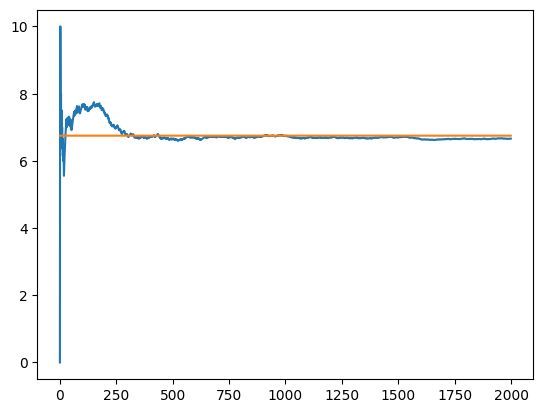

In [ ]:
plt.plot(Z)
plt.plot(6.75*np.ones(Z.shape))

In [ ]:
# first importing the necessary libraries

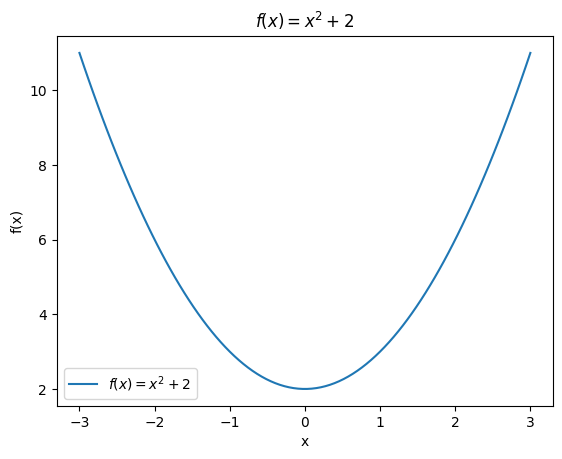

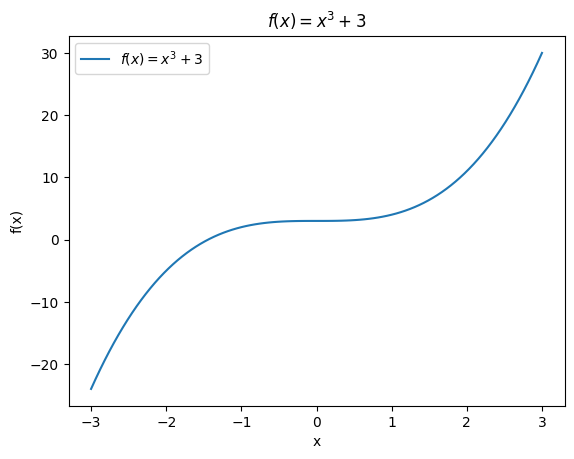

Exact Area under f1: 4.33333333333333
Estimated Area under f1: 4.3392
Exact Area under f2: 6.75000000000000
Estimated Area under f2: 6.75002


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, integrate

# Define a general function for Monte Carlo integration
def monte_carlo_integrate(func, a, b, N, M):
    S = 0
    for _ in range(N):
        x = a + (b - a) * np.random.random()
        y = M * np.random.random()
        if y < func(x):
            S += 1
    return M * (b - a) * (S / N)

# Define the functions to be integrated
def f1(x):
    return x**2 + 2

def f2(x):
    return x**3 + 3

# Calculate exact and estimated areas
def calculate_areas(func, a, b, N, M):
    x_sym = Symbol('x')
    exact_area = integrate(func(x_sym), (x_sym, a, b)).evalf()
    estimated_area = monte_carlo_integrate(func, a, b, N, M)
    return exact_area, estimated_area

# Plotting function
def plot_function(func, title, a=-3, b=3):
    x = np.linspace(a, b, 100)
    y = func(x)
    plt.plot(x, y, label=title)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

# Plot the functions
plot_function(f1, "$f(x) = x^2 + 2$")
plot_function(f2, "$f(x) = x^3 + 3$")

# Calculate and print areas
exact_area_f1, estimated_area_f1 = calculate_areas(f1, 1, 2, 100000, 20)
exact_area_f2, estimated_area_f2 = calculate_areas(f2, 1, 2, 1000000, 20)

print("Exact Area under f1:", exact_area_f1)
print("Estimated Area under f1:", estimated_area_f1)
print("Exact Area under f2:", exact_area_f2)
print("Estimated Area under f2:", estimated_area_f2)


# Visualization

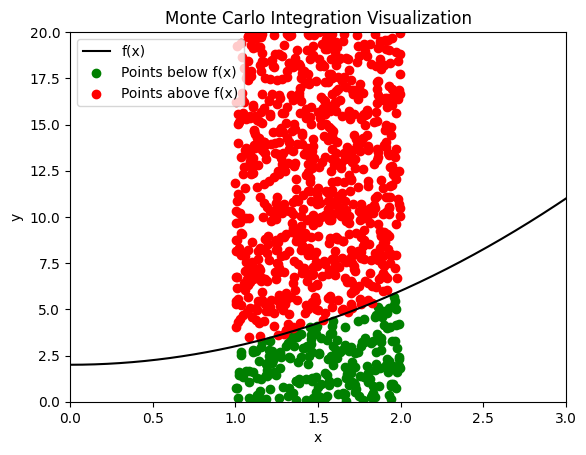

In [ ]:
# Function to plot points for Monte Carlo integration
def plot_monte_carlo(func, a, b, M, N):
    x_points = a + (b - a) * np.random.random(N)
    y_points = M * np.random.random(N)
    below = y_points < func(x_points)
    above = np.invert(below)

    # Plotting the function
    x = np.linspace(a - 1, b + 1, 400)
    y = func(x)
    plt.plot(x, y, label="f(x)", color='black')

    # Plotting the points
    plt.scatter(x_points[below], y_points[below], color='green', label='Points below f(x)')
    plt.scatter(x_points[above], y_points[above], color='red', label='Points above f(x)')

    # Setting up the plot limits and labels
    plt.xlim(a - 1, b + 1)
    plt.ylim(0, M)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Monte Carlo Integration Visualization")
    plt.legend()

    plt.show()

# Function to be integrated
def f(x):
    return x**2 + 2

# Parameters for Monte Carlo Integration
a, b, M, N = 1, 2, 20, 1000

# Plotting the Monte Carlo Integration
plot_monte_carlo(f, a, b, M, N)

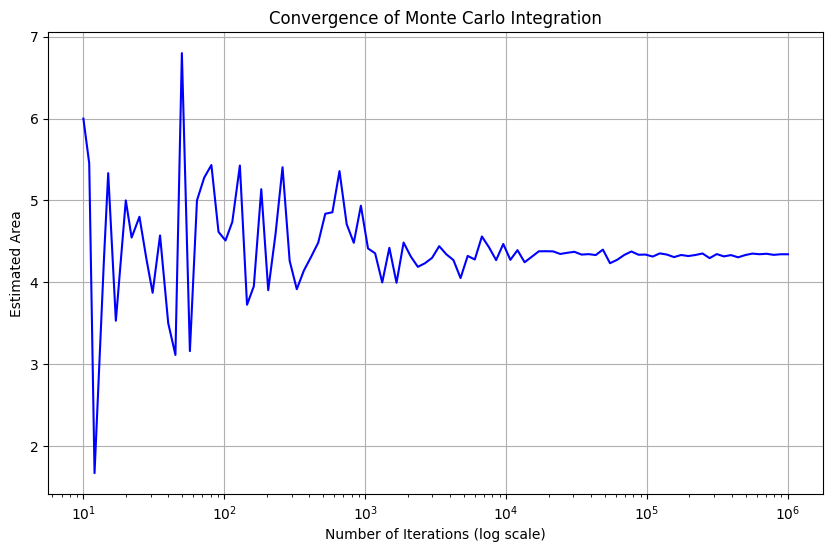

In [ ]:
# Function for Monte Carlo Integration
def monte_carlo_integrate(func, a, b, N, M):
    S = 0
    for _ in range(N):
        x = a + (b - a) * np.random.random()
        y = M * np.random.random()
        if y < func(x):
            S += 1
    return M * (b - a) * (S / N)

# Function to be integrated
def f(x):
    return x**2 + 2

# Parameters
a, b, M = 1, 2, 20
iterations = np.logspace(1, 6, 100, dtype=int)  # Using logarithmically spaced iterations for smoother curve
estimated_areas = []

# Calculate estimated areas for different numbers of iterations
for N in iterations:
    estimated_area = monte_carlo_integrate(f, a, b, N, M)
    estimated_areas.append(estimated_area)

# Plotting convergence
plt.figure(figsize=(10, 6))
plt.plot(iterations, estimated_areas, color='blue')
plt.xscale('log')
plt.xlabel('Number of Iterations (log scale)')
plt.ylabel('Estimated Area')
plt.title('Convergence of Monte Carlo Integration')
plt.grid(True)
plt.show()